In [0]:
### klasifikasi dengan menggunakan svm 
### svm 
#import data
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

In [0]:
!wget -O titanic.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2019-07-30 03:17:16--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2019-07-30 03:17:16 (1.50 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [0]:
data = pd.read_csv('titanic.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [0]:
###clean data
print ("Shape of dataset before cleaning: ", data.size)
data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data = data.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", data.size)
data.head(5)

Shape of dataset before cleaning:  10692
Shape of dataset after cleaning:  2196


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [0]:
variable = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
variable.head(100)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,female,38.0,1,0,71.2833,C
1,1,female,35.0,1,0,53.1000,S
2,1,male,54.0,0,0,51.8625,S
3,3,female,4.0,1,1,16.7000,S
4,1,female,58.0,0,0,26.5500,S
5,2,male,34.0,0,0,13.0000,S
6,1,male,28.0,0,0,35.5000,S
7,1,male,19.0,3,2,263.0000,S
8,1,female,49.0,1,0,76.7292,C
9,1,male,65.0,0,1,61.9792,C


In [0]:
X = variable.values
X[0:2]

array([[1, 'female', 38.0, 1, 0, 71.2833, 'C'],
       [1, 'female', 35.0, 1, 0, 53.1, 'S']], dtype=object)

In [0]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['male','female'])
X[:,1] = sex.transform(X[:,1])

em = preprocessing.LabelEncoder()
em.fit(['S','C','Q'])
X[:,6] = em.transform(X[:,6])


In [0]:
X[0:5]

array([[1, 0, 38.0, 1, 0, 71.2833, 0],
       [1, 0, 35.0, 1, 0, 53.1, 2],
       [1, 1, 54.0, 0, 0, 51.8625, 2],
       [3, 0, 4.0, 1, 1, 16.7, 2],
       [1, 0, 58.0, 0, 0, 26.55, 2]], dtype=object)

In [0]:
data['Survived'] = data['Survived'].astype('int')
y = np.asarray(data['Survived'])
y[0:100]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set', X_train.shape, y_train.shape)
print('test set', X_test.shape,y_test.shape)

Train set (146, 7) (146,)
test set (37, 7) (37,)


In [0]:
svm1 = svm.SVC(kernel='rbf', gamma='auto')
svm1.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn import svm
yhat = svm1.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.71      0.96      0.81        25

    accuracy                           0.70        37
   macro avg       0.69      0.56      0.54        37
weighted avg       0.69      0.70      0.64        37

Confusion matrix, without normalization
[[ 2 10]
 [ 1 24]]


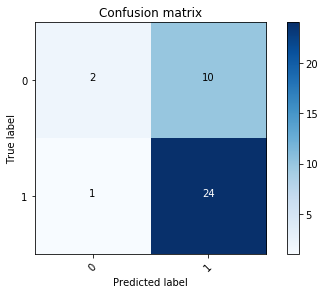

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

In [0]:
f1_score(y_test,yhat, average='weighted')


0.6361887311039853

In [0]:
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7027027027027027

In [0]:
#######################classification using decision tree
from sklearn.tree import DecisionTreeClassifier
!apt-get -qq install -y graphviz && pip install -q pydotplus
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

#################



In [0]:
tre = DecisionTreeClassifier(criterion="gini", max_depth = 10)
tre

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
tre.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
ptre = tre.predict(X_test)


In [0]:
print (ptre [0:5])
print (y_test [0:5])

[1 1 1 1 0]
[1 0 1 1 0]


In [0]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, ptre))

DecisionTrees's Accuracy:  0.7297297297297297


In [0]:
data['Survived'] = data['Survived'].astype('str')


In [0]:
############jika dibandingka dengan tingkat akurasi yang didapatkan oleh kedua 
#klasifikasi maka klasifikasi dengan menggunakan decision tree k=lebih unggul degan 
#tingkat akurasi sebesar0.729


In [0]:
variable.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,female,38.0,1,0,71.2833,C
1,1,female,35.0,1,0,53.1000,S
2,1,male,54.0,0,0,51.8625,S
3,3,female,4.0,1,1,16.7000,S
4,1,female,58.0,0,0,26.5500,S


In [0]:
###dari hasil prediksi 5 data awal pada decision tree penumpang yang selamat 
###ber initial 1 dan yang meninggal 0 
# dari head data yaitu berjenis kelamin 4 perempuan 1 laki-laki dengan dengan 
# rentang umur 4 tahun hingga 54 hatun   
